# 개요

* API(Application Programming Interface)는 소프트웨어의 구현과 유지보수를 단순화하기 위한 컴퓨터 프로그램의 다른 부분 사이의 인터페이스 또는 통신 프로토콜
* 다른사람이 작성해놓은 코드인 라이브러리를 사용할 수 있게 도와주는 설명서, 설계도, 그리고 코드 그 자체
* 프로그램의 행위정보를 반영할 수 있어 머신러닝에서 자주 사용
* api는 공식 API와 서드파티 API가 존재함
* api는 클래스, 메소드, 메소드 디스크립터(인자, 리턴타입)로 구성

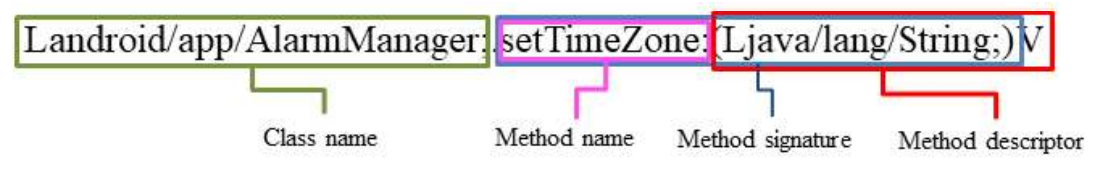

# 추출방법

## apktool 사용

apktool로 apk를 디컴파일 후, smali 디렉토리 내부의 .smali 파일들을 모두 읽어 추출한다

* 정확도 및 신뢰성은 높음
* 시간이 더럽게 오래걸림
* 극히 일부 smali는 읽히지 않는 현상 발견

In [1]:
import os
os.system('apktool d /home/ghwns82/ap.apk -o ./ap')

I: Using Apktool 2.6.0 on ap.apk
I: Loading resource table...
I: Decoding AndroidManifest.xml with resources...
I: Loading resource table from file: /home/ghwns82/.local/share/apktool/framework/1.apk
I: Regular manifest package...
I: Decoding file-resources...
I: Decoding values */* XMLs...
I: Baksmaling classes.dex...
I: Copying assets and libs...
I: Copying unknown files...
I: Copying original files...


0

In [13]:
result = []
for root, dirs, files in os.walk('./ap/smali/'):
    for file in files:
        if os.path.splitext(file)[1] == '.smali':
            smali_path = root+'/'+file
            with open(smali_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    if line.find("invoke-")>=0:
                        result.append(line.split('},')[1][:-1])

In [14]:
result[:10]

[' Ljava/lang/Object;-><init>()V',
 ' Landroid/support/v4/accessibilityservice/AccessibilityServiceInfoCompat$AccessibilityServiceInfoStubImpl;-><init>()V',
 ' Landroid/support/v4/accessibilityservice/AccessibilityServiceInfoCompatIcs;->getCanRetrieveWindowContent(Landroid/accessibilityservice/AccessibilityServiceInfo;)Z',
 ' Landroid/support/v4/accessibilityservice/AccessibilityServiceInfoCompat$AccessibilityServiceInfoIcsImpl;->getCanRetrieveWindowContent(Landroid/accessibilityservice/AccessibilityServiceInfo;)Z',
 ' Landroid/support/v4/accessibilityservice/AccessibilityServiceInfoCompatIcs;->getDescription(Landroid/accessibilityservice/AccessibilityServiceInfo;)Ljava/lang/String;',
 ' Landroid/support/v4/accessibilityservice/AccessibilityServiceInfoCompatIcs;->getId(Landroid/accessibilityservice/AccessibilityServiceInfo;)Ljava/lang/String;',
 ' Landroid/support/v4/accessibilityservice/AccessibilityServiceInfoCompatIcs;->getResolveInfo(Landroid/accessibilityservice/AccessibilityServi

## dexdump 사용(linux)

In [15]:
apk_path = "/home/ghwns82/ap.apk"
txt_path = './ap_result.txt'

terminal = f"dexdump -d {apk_path} | grep invoke- | cut -d '}}' -f 2 | cut -d ' ' -f 2 > {txt_path}"
os.system(terminal)

0

## dexdump.exe의 경우(window)

* 권장하지 않음

In [ ]:
terminal = f"C:/Users/junve/Desktop/dexdump.exe -d -i {apk_path} > {txt_path}"
os.system(terminal)